# Labo 9 - Data preprocessing

In dit labo focussen we ons deels op het opkuisen van data en meerbepaald het omgaan met missing values. Daarnaast geven de opdrachten ook de gelegenheid de reeds geziene Python kennis nog eens toe te passen op een omvangrijke dataset. 
Ook worden nog een aantal extra visualisatietechnieken bekeken. Onderandere hoe je geografische data op een wereldkaart kan plaatsen met behulp van Geopandas.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 500)

## Demos

### Data cleaning

Beschouw de zwangerschapsdiabetes dataset waar een aantal ontbrekende en foutieve waarden aanwezig zijn. 
Stap voor stap zal deze dataset worden opgekuist.

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29,0.0
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54,1.0


#### Aantal ontbrekende waarden opvragen

In [3]:
# aantal missing values

missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(missing_values_count))

Het aantal ontbrekende waarden in de dataset:
Pregnancies                 3
Glucose                     2
BloodPressure               7
SkinThickness               3
Insulin                     5
BMI                         3
DiabetesPedigreeFunction    3
Age                         0
Outcome                     1
dtype: int64


In [4]:
# Toon de rijen met ontbrekende waarden

null_data = dataset[dataset.isnull().any(axis=1)]
null_data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
12,10.0,139.0,NaN,0.0,0.0,27.1,1.441,57,0.0
22,7.0,196.0,90.0,0.0,0.0,NaN,0.451,41,1.0
44,7.0,159.0,64.0,NaN,0.0,27.4,0.294,40,0.0
113,4.0,76.0,NaN,0.0,0.0,34.0,0.391,25,0.0
167,4.0,120.0,NaN,0.0,0.0,29.6,0.709,34,0.0
179,NaN,130.0,82.0,0.0,0.0,39.1,0.956,37,1.0
180,6.0,87.0,80.0,0.0,NaN,23.2,0.084,32,0.0
182,1.0,0.0,74.0,20.0,23.0,27.7,NaN,21,0.0
188,8.0,109.0,76.0,39.0,NaN,27.9,0.640,31,1.0


#### Listwise deletion

Dit betekent dat alle rijen worden verwijderd waar er minstens 1 ontbrekende waarde voorkomt.  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [5]:
# Listwise deletion: verwijder alle rijen met missing values

dataset_dropna = dataset.dropna(axis=0)
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(dataset_dropna.isnull().sum()))
dataset_dropna.head(20)

Het aantal ontbrekende waarden in de dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29,0.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54,1.0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30,0.0


#### Substitutie van ontbrekende waarden door het gemiddelde

De ontbrekende waarde wordt vervangen door het gemiddelde van alle niet onbrekende waarden in die kolom.

In [6]:
# Gemiddelde substitutie
dataset = pd.read_csv('diabetes.csv')
gemiddelde = dataset.mean()
print(gemiddelde)

dataset = dataset.fillna(dataset.mean())
dataset.head(20)

Pregnancies                   3.850980
Glucose                     120.890339
BloodPressure                68.872536
SkinThickness                20.568627
Insulin                      79.943644
BMI                          31.975556
DiabetesPedigreeFunction      0.894133
Age                          33.240885
Outcome                       0.349413
dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00000,148.0,72.000000,35.0,0.0,33.6,0.627,50,1.0
1,1.00000,85.0,66.000000,29.0,0.0,26.6,0.351,31,0.0
2,8.00000,183.0,64.000000,0.0,0.0,23.3,0.672,32,1.0
3,1.00000,89.0,66.000000,23.0,94.0,28.1,0.167,21,0.0
4,0.00000,137.0,40.000000,35.0,168.0,43.1,2.288,33,1.0
5,5.00000,116.0,74.000000,0.0,0.0,25.6,0.201,30,0.0
6,3.00000,78.0,50.000000,32.0,88.0,31.0,0.248,26,1.0
7,10.00000,115.0,0.000000,0.0,0.0,35.3,0.134,29,0.0
8,3.85098,197.0,70.000000,45.0,543.0,30.5,0.158,53,1.0
9,8.00000,125.0,96.000000,0.0,0.0,0.0,0.232,54,1.0


#### Onrealistische/foutieve waarden opsporen en opkuisen

In [7]:
# Opsporen van onrealistische waarden

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.850980,120.890339,68.872536,20.568627,79.943644,31.975556,0.894133,33.240885,0.349413
std,3.365794,31.934556,20.173841,15.906574,115.162787,7.876856,11.642888,11.760232,0.476785
min,0.000000,0.000000,-94.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.632500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,323.000000,81.000000,1.000000


In [8]:
# Insuline gehalte moet groter zijn dan 0
dataset= dataset[dataset['Insulin'] > 0]
# SkinThickness moet groter zijn dan 0
dataset= dataset[dataset['SkinThickness'] > 0]
#Glucose gehalte moet groter zijn dan 0
dataset= dataset[dataset['Glucose'] > 0]
#BMI moet groter zijn dan 0
dataset= dataset[dataset['BMI'] > 0]
#Bloodpressure kan niet negatief zijn
dataset = dataset[dataset['BloodPressure']>0]

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.00000,391.000000,391.000000
mean,3.295913,122.493326,70.651196,29.093526,155.956089,33.063876,1.34998,30.813299,0.329923
std,3.186997,30.844609,12.353553,10.529405,119.056353,7.031518,16.31192,10.162698,0.470787
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.08500,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,0.27050,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.45200,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.500000,190.000000,37.050000,0.68950,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,323.00000,81.000000,1.000000


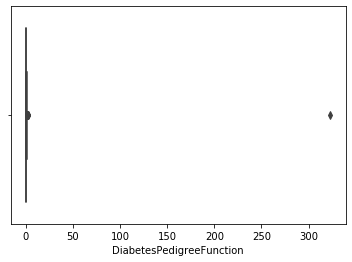

In [9]:
# Uitschieters bij de DiabetesPedigreeFunction

sns.boxplot(x=dataset['DiabetesPedigreeFunction'])

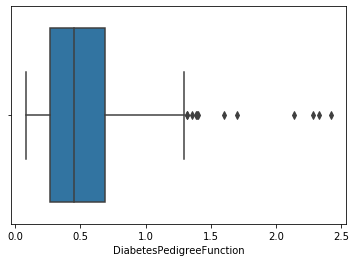

In [10]:
# Verwijderen van uitschieter bij DiabetesPedigreeFunction

gemiddelde = dataset['DiabetesPedigreeFunction'].mean()
stdafwijking = dataset['DiabetesPedigreeFunction'].std()

ondergrens = gemiddelde - 3* stdafwijking
bovengrens = gemiddelde + 3* stdafwijking

dataset = dataset[(dataset['DiabetesPedigreeFunction']<bovengrens) & (dataset['DiabetesPedigreeFunction']>ondergrens)]

sns.boxplot(x=dataset['DiabetesPedigreeFunction'])


In [11]:
# aantal overblijvende rijen in de dataset

dataset.shape

(390, 9)

### Interpolatie

Bij interpolatie proberen we (in tijdreeksen) de ontbrekende waarden te achterhalen op basis van de aangrenzende waarden.

In [12]:
dataset = pd.read_csv('temperaturen.csv')
dataset.head(20)

,tijdstip,temperatuur
0,0,7.0
1,1,10.0
2,2,15.0
3,3,NaN
4,4,27.0
5,5,33.0
6,6,29.0
7,7,43.0
8,8,NaN
9,9,NaN


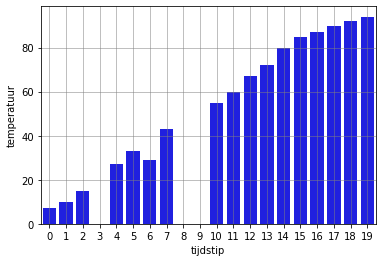

In [13]:
ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

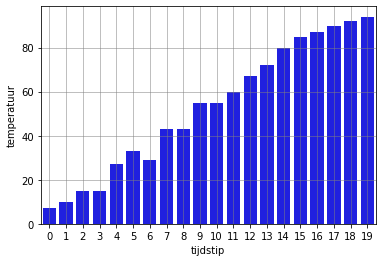

In [14]:
# interpolatie via dichtste waarde

dataset_interpolatie = dataset.interpolate(method ='nearest')

ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset_interpolatie, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

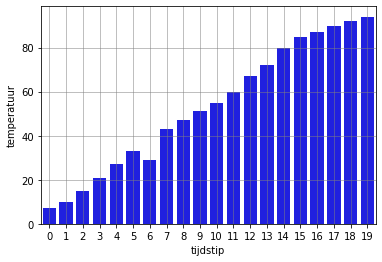

In [15]:
# interpolatie via lineaire interpolatie waarde

dataset_interpolatie = dataset.interpolate(method ='linear', limit_direction ='forward')

ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset_interpolatie, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

### Resampling

In [16]:
dataset = pd.read_csv('stockprices.csv', parse_dates =['Date'])
dataset.tail(20)

,Date,Open,High,Low,Close,Volume,Name
2999,2017-12-01,69.80,71.25,69.47,70.10,19712943,AABA
3000,2017-12-04,71.06,71.34,68.16,68.31,15533597,AABA
3001,2017-12-05,67.10,69.38,66.62,68.13,11963099,AABA
3002,2017-12-06,67.78,69.62,67.36,69.41,11646582,AABA
3003,2017-12-07,69.75,70.64,69.48,70.22,7084564,AABA
3004,2017-12-08,71.00,71.63,70.82,71.25,7021125,AABA
3005,2017-12-11,71.70,72.09,71.15,71.53,7359312,AABA
3006,2017-12-12,71.07,71.15,69.55,69.77,11296188,AABA
3007,2017-12-13,69.80,71.76,69.69,71.24,17321301,AABA
3008,2017-12-14,70.60,70.62,68.84,69.23,17077065,AABA


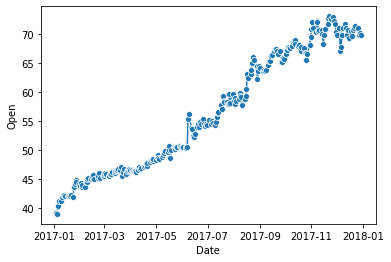

In [17]:
# Plotten van de openingskoers van 2017

dataset_2017 = dataset[pd.DatetimeIndex(dataset['Date']).year == 2017]
dataset_2017.head()

sns.lineplot(x ='Date',y='Open',data=dataset_2017,marker='o')

In [18]:
# Maandelijkse resampling
dataset_month = dataset_2017.resample('M', on='Date').mean()
dataset_month = dataset_month.reset_index()
dataset_month.head(20)


,Date,Open,High,Low,Close,Volume
0,2017-01-31,42.256000,42.628500,41.993000,42.425500,8.515003e+06
1,2017-02-28,44.916316,45.318947,44.651579,45.018421,7.192468e+06
2,2017-03-31,46.230870,46.540870,45.970435,46.268261,5.550294e+06
3,2017-04-30,47.207895,47.518421,46.963158,47.263684,6.918483e+06
4,2017-05-31,49.645909,50.044091,49.296364,49.725909,9.596977e+06
5,2017-06-30,53.327727,53.941364,52.619545,53.175909,4.943628e+07
6,2017-07-31,56.966000,57.538000,56.467500,57.067000,6.212384e+06
7,2017-08-31,61.336522,61.964348,60.763478,61.434783,5.878167e+06
8,2017-09-30,65.530000,66.081000,65.013500,65.538000,6.951704e+06
9,2017-10-31,67.611364,68.184091,67.093636,67.637727,5.671722e+06


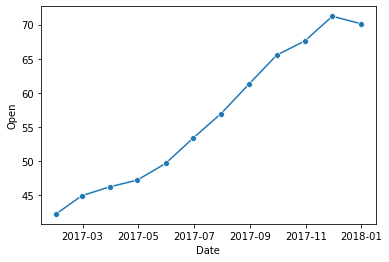

In [19]:
sns.lineplot(x ='Date',y='Open',data=dataset_month, marker='o')

# One hot encoding

In [20]:
raw_data = {'food_name': ['Apple', 'Chicken', 'Broccoli', 'Chocolat'],'Calories': [95, 231, 50, 549]}
dataset = pd.DataFrame(raw_data)
dataset.head()

,food_name,Calories
0,Apple,95
1,Chicken,231
2,Broccoli,50
3,Chocolat,549


In [21]:
# One-hot encoding


dataset = pd.concat([dataset,pd.get_dummies(dataset['food_name'], prefix='food')],axis=1)
dataset.drop(['food_name'],axis=1, inplace=True)
dataset.head()

,Calories,food_Apple,food_Broccoli,food_Chicken,food_Chocolat
0,95,1,0,0,0
1,231,0,0,1,0
2,50,0,1,0,0
3,549,0,0,0,1


## Opdracht - Deel 1: IMDB

De dataset IMDB.csv bevat gegevens van 1000 films en hun IMDB score.

We beginnen eerst met het cleanen van de dataset door inconsistente data te verwijderen of op te vullen. Daarna wordt de data gevisualieerd of wordt de gevraagde informatie uit de dataset gepuurd.

In [22]:
dataset = pd.read_csv('IMDB.csv')
dataset.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Unnamed: 11,Unnamed: 12
0,1,Guardians of the Galaxy,NaN,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,NaN,1000.0
1,2,Prometheus,"Adventure,Mystery",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,NaN,872.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,NaN,NaN
3,4,Sing,"Animation,Comedy",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,NaN,NaN
4,5,Suicide Squad,"Action,Adventure",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,NaN,NaN


In [23]:
# Dimensie van de dataset
print(dataset.shape)

(1000, 13)


### Verwijderen of opvullen van missing values

Bepaal het aantal missing values in elke kolom van de dataset.

In [ ]:
#  Bepalen van het aantal missing values


Verwijder alle kolommen die meer dan 129 waarden bevat

Verwijder alle rijen uit de dataset waarbij zowel de genre, metascore en revenue niet gekend is. Verwijderen van rijen op basis van ontbrekende waarden in kolommen kan via dataset.dropna(subset=...)

Bijvoorbeeld verwijderen van alle rijen met ontbrekende waarden in 2 verschillende kolommen:

`dataset_dropna = dataset.dropna(subset = ['kolomnaam1', 'kolomnaam2'])`

In [ ]:
# Verwijder alle rijen uit de dataset waarbij de zowel het genre, de metascore en de revenue niet gekend zijn


Er is een feature (kolom) aanwezig in de dataset waar het niet logisch is om de ontbrekende waarden op te vullen met de mediaan/gemiddelde. Welke feature is dit? Verwijder alle rijen waar de waarde ontbreekt uit deze kolom.

Vervang de ontbrekende waarden in de kolommen Revenue en Metascore door het gemiddelde van die kolommen.
Je kan dit via `dataset=dataset.fillna({'kolomnaam1':gemiddelde_kolom1,'kolomnaam2':gemiddelde_kolom2})`

In [ ]:
# gemiddelde revenue en metascore: 

In [ ]:
# Vervang de ontbrekende waarden in de kolommen Revenue en Metascore door het gemiddelde van die kolommen.



### Visualaties en analyse

Gebruik de Seaborn countplot om het aantal films per jaar te visualiseren. Gebruik het jaartal op de x-as en het aantal films op de y-as.

In [ ]:
# Grafiek van het aantal films per jaar. 


Gebruik de Seaborn countplot om de distributie van de ratings in kaart te brengen.
Sorteer de countplot van de meest gegeven rating naar de minst gegeven rating. Het sorteren kan in de countplot via de property `order=dataset['kolomnaam'].value_counts().index`

In [ ]:
# Distributie van de Rating. Sorteer de countplot van meest gegeven rating naar de minst gegeven rating




Gebruik de Seaborn countplot om de distributie van de favoriete doelen ('Target_type') in kaart te brengen. Sorteer de countplot van meest voorkomende doelen naar minst voorkomende doelen.

In [ ]:
# Gebruik de Seaborn countplot om de distributie van de favoriete doelen ('Target_type') in kaart te brengen.
# Sorteer de countplot van meest voorkomende naar minst voorkomende.



Welk genre komt het meest voor in de dataset?

Bepaal welke director het meest films heeft geregiseerd.

In [ ]:
# Bepaal welke director het meest films heeft geregiseerd.



Welk genre kende de hoogste maximale revenue en welk genre het laagst?  Groepeer eerst per genre via `dataset.groupby(['Genre']).max()`

In [ ]:
# Welk genre heeft de hoogste maximale revenue?


# Welk genre heeft de laagste maximale revenue?



# Opdracht deel 2 - Vision 42

Deze dataset komt uit een project voor het bedrijf vision 42. Deze dataset bestaat uit waarden afkomstig van 2 sensoren, die hun positie in de x  en z richting opmeten. 

In [ ]:
dataset = pd.read_csv('Vision42.csv')
dataset.head(10)

In [ ]:
dataset.shape

Bevat deze dataset ontbrekende waarden?

Er zijn hier toch heel wat ontbrekende waarden, maar aangezien dit een tijdsreeks is mag je de data niet zomaar verwijderen.   
plot de eerste 50 waarden van de dataset in een barplot waar de x-waarde de datum is en de y-waarde de kolom N16_z

Gebruik lineare interpolatie om dataset aan te vullen (best de dataset opslaan in een andere dataframe). Plot hierna opnieuw de eerste 50 datapunten in een barplot

Vul de dataset nu opnieuw aan maar met de dichtste waarde. Plot opnieuw de eerste 50 waarden.

In [ ]:
# interpolatie via dichtste waarde


# Opdracht deel 3 - One-hot encoding

<img src="Star Wars.jpg">
Deze dataset bestaat uit de mening van personen over een bepaald karakter in Star Wars. Deze dataset wordt gebruikt om de voorspellen of een persoon fan is van Star Wars of niet. Deze dataset heeft echter nog heel wat preprocessing stappen nodig voordat het gebruikt kan worden om voorspellingen te gaan doen. Een deel van de preprocessing stappen moeten jullie zelf doen, voor een ander deel is er sample code voorzien. Daarna is er ook wat code voorzien waar er Machine learning op wordt toegepast (Just for fun :D )

In [ ]:
dataset = pd.read_csv('StarWars.csv')
dataset.head()

Zijn er ontbrekende waarden in deze dataset?

Een AI model kan enkel om met numerieke waarden, dus geen strings, daarom worden alle yes en no in de dataset verandert naar 0 en 1.
vervang alle 'Yes'  naar 1 en alle 'No' naar 0. Dit kan via de methode:  
`dataset = dataset.replace({'te_vervangen_waarde1':naar_deze_waarde1, 'te_vervangen_waarde2':naar_deze_waarde2})`

De volgende waarden moeten omgezet worden met one_hot_encoding: 
['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
 'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?', 'Age', 'Education', 'Location']

De kolom gender mag verwijdert worden, enig idee waarom?

In [ ]:
# Waarom?

In [ ]:
# Kolom verwijderen: 

De target(dus de waarde die we proberen te voorspellen) hier is of een persoon al dan niet fan. Plot het aantal fans en niet fans.


### Vanaf hier start de voorbeeld code van AI, indien je de dataset correct gepreprocessed hebt zou de code perfect moeten werken.
het kan wel zijn dat je nog sklearn moet installeren, dit kan je doen door in je command line het volgende te typen:  
`pip install -U scikit-learn`  
(zie documentatie indien je anaconda gebruikt: https://scikit-learn.org/stable/install.html)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

De dataset wordt opgesplits in target (je te voorspellen waarde) en features  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# De dataset wordt opgesplits in target(je te voorspellen waarde) en features
y = dataset['StarWars fan'].values
X = dataset.drop('StarWars fan',axis=1)

Dataset wordt opgesplitst in een training set en een test set, training set wordt gebruikt om model te trainen en test set wordt gebruik om te valideren hoe goed je model werkt.

In [ ]:
# Opsplitsen in een training set en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=0)

In [ ]:
# Heel eenvoudig model die voorspellingen doet
logreg = linear_model.LogisticRegression(C=1,solver='liblinear',class_weight='balanced',penalty='l1')
logreg.fit(X_train, y_train)

# testen van de logistic regression classifier

y_pred = logreg.predict(X_test)

print('Accuracy: {}%'.format(accuracy_score(y_test,y_pred)*100))
print('Matrix:\n', confusion_matrix(y_test,y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Trainen en testen van een random forest tree classifier
number_of_trees = 100
max_number_of_features = 6

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)

RFCmodel.fit(X_train,y_train)

# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 